# **Introduction** 
Up until now, we have been working with structured and pre-populated notebooks. In this particular notebook, we will take a different approach and test our skills by not providing the code explicitly. This exercise is designed to challenge you and enhance your understanding of assembling the various components required for data analysis with Python. By completing this exercise, you will gain a deeper understanding and build confidence in your ability to put together the necessary elements for effective data analysis.

---

# **Background**
Single-cell RNA sequencing (scRNA-seq) is a technique used to analyze gene expression at the individual cell level. It provides a high-resolution view of gene expression patterns, allowing researchers to study cellular heterogeneity, identify cell types, and explore dynamic changes in gene expression. 

For this task, I have obtained a smaller version of a published single-cell RNA sequencing (scRNA-seq) dataset from a study on mouse fibroblast reprogramming (https://doi.org/10.1016/j.cell.2019.01.006). We will work with two files: one containing metadata about the cells, and the other containing the gene expression count data.






"
./data/mouse_reprogramming_cell_features.csv" and "./data/mouse_reprogramming_exp.csv"

The features file contains the cell meta data and the exp file contains the expression data. 

## 1. Read in the data
Check the data format and what data it contains

In [2]:
# which modules do we need to read in a csv
import pandas as pd

feat_df = pd.read_csv('./data/mouse_reprogramming_cell_features.csv', index_col=1, header=2)
feat_df.head()

,Unnamed: 0,day,MEF.identity,Astrocytes,32-cell,cell_growth_rate,serum,2i,major_cell_sets,cell_sets,batch,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,OG_log10_total_counts,age,cell_type
D8_Dox_C1_TACTTGTAGAGGGATA-1,NaN,8,-0.268509,-0.155554,-0.179813,1.842216,True,True,NaN,MET,D8_Dox_C1,1332,7.195187,2373,7.772332,3.375298,8,MET
D8_Dox_C1_ACCAGTATCTCAAGTG-1,NaN,8,-0.216595,-0.166959,-0.156527,1.022352,True,True,NaN,MEF/other,D8_Dox_C1,1111,7.013915,1905,7.552762,3.279895,8,MEF/other
D8_Dox_C2_TTGGCAATCCTAGTGA-1,NaN,8,-0.240737,-0.104407,-0.117234,1.430428,True,True,NaN,MET,D8_Dox_C2,1078,6.983790,1949,7.575585,3.289812,8,MET
D8_Dox_C2_GCGGGTTTCGACCAGC-1,NaN,8,-0.132689,-0.046443,-0.111150,0.592272,True,True,NaN,MEF/other,D8_Dox_C2,2002,7.602401,4473,8.406038,3.650599,8,MEF/other
D8_Dox_C2_GGGTTGCGTCGCGGTT-1,NaN,8,-0.290204,-0.171452,-0.269101,1.199025,True,True,NaN,MET,D8_Dox_C2,1160,7.057037,2048,7.625107,3.311330,8,MET


In [3]:
exp_df = pd.read_csv( './data/mouse_reprogramming_exp.csv', index_col=0)
exp_df.head()

,Eef1a1,Ftl1,Tmsb4x,S100a6,Gm8730,Fau,Ppia,Eef1b2,Tpt1,Hsp90ab1,...,Ccnd2,Gapdh,Naca,Tmsb10,Actb,Cox7c,Serbp1,Cox8a,Eef1g,Oaz1
D8_Dox_C1_TACTTGTAGAGGGATA-1,17.0,35.0,29.0,4.0,27.0,16.0,12.0,17.0,7.0,9.0,...,2.0,4.0,9.0,15.0,9.0,9.0,10.0,14.0,6.0,13.0
D8_Dox_C1_ACCAGTATCTCAAGTG-1,39.0,28.0,17.0,10.0,14.0,28.0,12.0,24.0,13.0,13.0,...,11.0,8.0,11.0,8.0,8.0,10.0,8.0,11.0,6.0,5.0
D8_Dox_C2_TTGGCAATCCTAGTGA-1,41.0,43.0,6.0,5.0,17.0,19.0,12.0,14.0,12.0,10.0,...,4.0,13.0,16.0,5.0,1.0,11.0,3.0,9.0,9.0,6.0
D8_Dox_C2_GCGGGTTTCGACCAGC-1,101.0,76.0,99.0,54.0,35.0,50.0,39.0,36.0,41.0,23.0,...,50.0,16.0,18.0,13.0,7.0,16.0,10.0,20.0,7.0,8.0
D8_Dox_C2_GGGTTGCGTCGCGGTT-1,48.0,26.0,19.0,30.0,16.0,20.0,7.0,19.0,11.0,13.0,...,1.0,12.0,8.0,20.0,5.0,6.0,7.0,7.0,15.0,3.0


## 2. How many cells were captured?
How many replicates do we have and how many cells were captured in each. In the features dataframe, the replicates are under the 'batch' column. How many cell cells were captured in each batch? 

In [4]:
feat_df['batch'].value_counts()

D8_Dox_C1    279
D8_Dox_C2    271
Name: batch, dtype: int64

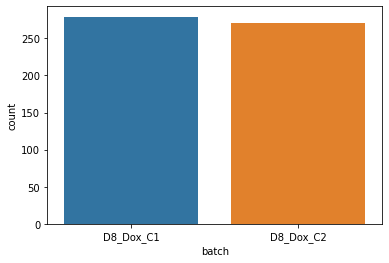

In [5]:
import seaborn as sns

sns.countplot( data=feat_df, x='batch');

## 3. What is the total gene count per cell.
What are distribution of total genes captured per cell per replicate?  

In [6]:
feat_df.columns

Index(['Unnamed: 0', 'day', 'MEF.identity', 'Astrocytes', '32-cell',
       'cell_growth_rate', 'serum', '2i', 'major_cell_sets', 'cell_sets',
       'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'OG_log10_total_counts', 'age', 'cell_type'],
      dtype='object')

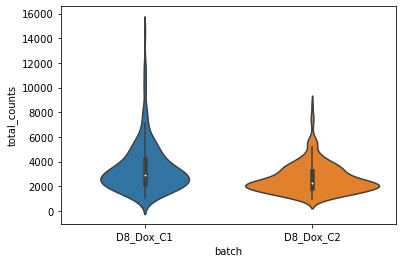

In [7]:
sns.violinplot(x='batch', y='total_counts', data=feat_df);

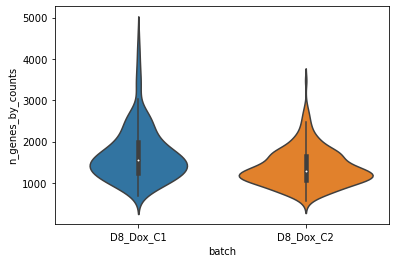

In [8]:
sns.violinplot(x='batch', y='n_genes_by_counts', data=feat_df);

## 4. What is the mean variance relationship in the expression data 

In [9]:
import numpy as np

In [10]:
exp_df.head()

,Eef1a1,Ftl1,Tmsb4x,S100a6,Gm8730,Fau,Ppia,Eef1b2,Tpt1,Hsp90ab1,...,Ccnd2,Gapdh,Naca,Tmsb10,Actb,Cox7c,Serbp1,Cox8a,Eef1g,Oaz1
D8_Dox_C1_TACTTGTAGAGGGATA-1,17.0,35.0,29.0,4.0,27.0,16.0,12.0,17.0,7.0,9.0,...,2.0,4.0,9.0,15.0,9.0,9.0,10.0,14.0,6.0,13.0
D8_Dox_C1_ACCAGTATCTCAAGTG-1,39.0,28.0,17.0,10.0,14.0,28.0,12.0,24.0,13.0,13.0,...,11.0,8.0,11.0,8.0,8.0,10.0,8.0,11.0,6.0,5.0
D8_Dox_C2_TTGGCAATCCTAGTGA-1,41.0,43.0,6.0,5.0,17.0,19.0,12.0,14.0,12.0,10.0,...,4.0,13.0,16.0,5.0,1.0,11.0,3.0,9.0,9.0,6.0
D8_Dox_C2_GCGGGTTTCGACCAGC-1,101.0,76.0,99.0,54.0,35.0,50.0,39.0,36.0,41.0,23.0,...,50.0,16.0,18.0,13.0,7.0,16.0,10.0,20.0,7.0,8.0
D8_Dox_C2_GGGTTGCGTCGCGGTT-1,48.0,26.0,19.0,30.0,16.0,20.0,7.0,19.0,11.0,13.0,...,1.0,12.0,8.0,20.0,5.0,6.0,7.0,7.0,15.0,3.0


In [11]:
import matplotlib.pyplot as plt

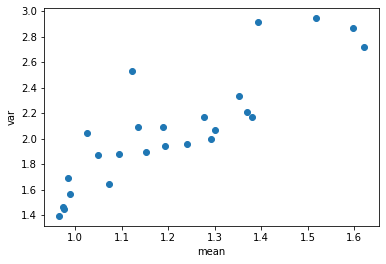

In [12]:
mean = exp_df.mean(axis=0)
var = exp_df.var(axis=0)

plt.scatter( np.log10(mean), np.log10(var));
plt.ylabel('var')
plt.xlabel('mean')
plt.show()

## 5. Plot a clustermap of cells vs genes from the expression dataframe

/home/chuck/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


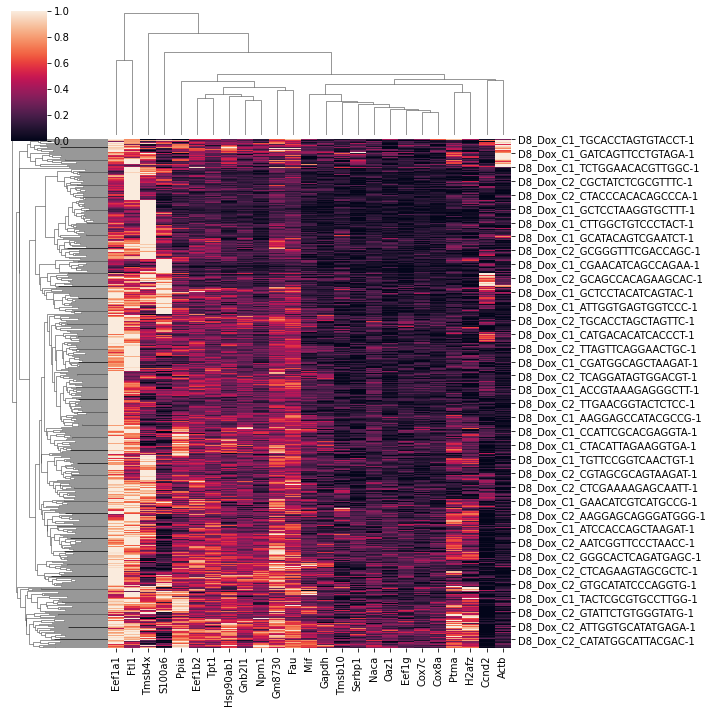

In [13]:
sns.clustermap( exp_df, standard_scale=0);

## 6. Plot a correlation clustermap of the cells

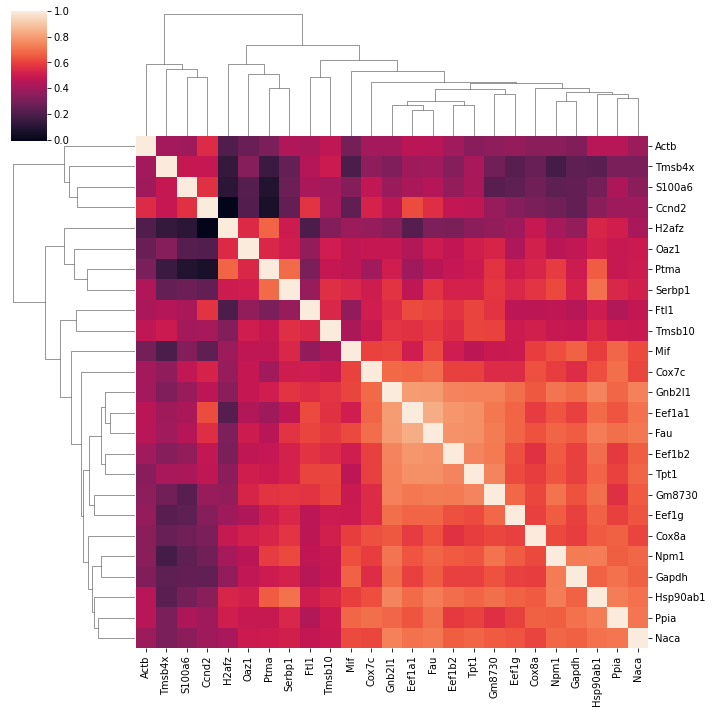

In [14]:
sns.clustermap( exp_df.corr());

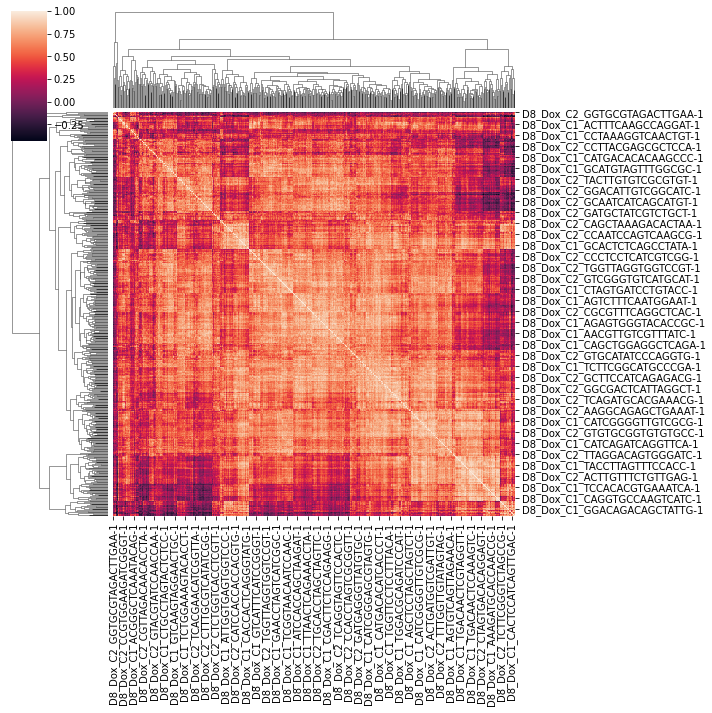

In [15]:
sns.clustermap(exp_df.T.corr());